<a href="https://colab.research.google.com/github/lojedaa/Talleres-Ciencia-de-Datos/blob/main/Taller_1/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1

MINE-4101: Applied Data Science  
Univerisdad de los Andes

Integrantes:

*  Lina Ojeda - 202112324 - l.ojedaa@uniandes.edu.co
*  William Toro -


  
**Dataset:** Hotel bookings [[dataset](https://drive.google.com/file/d/1VA3XyONx5mFEzx1YN_ZsPAkEMWXuRBqI/view?usp=sharing) | [dictionary](https://docs.google.com/spreadsheets/d/1p-lHMlXSUAYdP19odh3AqqkowHRWfWSHWXCURqMOmCc/edit?usp=sharing)].


Última actuaización: Septiembre, 2025

# 0. Importaciones y carga de datos

## 0.1 Importaciones

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 0.2 Carga de datos

In [2]:
# Configuración de Pandas para ampliar el número de columnas y filas que se muestran

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [3]:
# Carga de archivos csv desde repositorio git hub
hotel_file_url = 'https://raw.githubusercontent.com/lojedaa/Talleres-Ciencia-de-Datos/refs/heads/main/Taller_1/hotel_bookings_modified.csv'
hotel_dict_url = 'https://raw.githubusercontent.com/lojedaa/Talleres-Ciencia-de-Datos/refs/heads/main/Taller_1/hotel_dictionary.csv'

hotel_df = pd.read_csv(hotel_file_url, low_memory=False)
hotel_dict = pd.read_csv(hotel_dict_url, sep=',', header=0)

Una vez cargados ambos archivos visualizamos sus tipos dtypes y las estadisticas basicas describe() de las variables. Para las variables numéricas entrega medidas como el conteo de valores no nulos, la media, la desviación estándar, el mínimo, los cuartiles y el valor máximo, lo que permite entender rápidamente la distribución y dispersión de los datos. En el caso de las variables categóricas, el resultado incluye el número de valores no nulos, la cantidad de categorías distintas, la categoría más frecuente y su frecuencia, facilitando así una primera exploración tanto de datos numéricos como de texto.

In [6]:
hotel_df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [4]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,58895.000000,58895.000000,58307.000000,58895.000000,58895.000000,58895.000000,58895.000000,58895.000000,58891.000000,58895.000000,58895.000000,58895.000000,58895.000000,58895.000000,49763.000000,58894.000000,58894.000000,58306.000000,58894.000000,201.000000
mean,0.411393,100.050904,2205.522939,27.837389,15.766432,1.058154,2.847576,1.969148,0.112937,0.136599,0.030189,0.069191,0.099618,0.243009,146.983080,3.525979,96.250426,0.096697,0.512225,34.417910
std,0.492090,101.162420,1837.392466,13.346053,8.783036,1.093032,2.235486,2.943454,0.419710,3.115889,0.171109,1.102138,0.829166,0.695205,120.114987,21.841676,58.555599,0.300382,0.768378,38.571032
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,-1.000000
25%,0.000000,17.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,60.000000,0.000000,0.000000,-1.000000
50%,0.000000,69.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,84.000000,0.000000,0.000000,-1.000000
75%,1.000000,157.000000,2016.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,120.000000,0.000000,1.000000,65.000000
max,1.000000,737.000000,20016.000000,53.000000,31.000000,19.000000,50.000000,100.000000,10.000000,100.000000,1.000000,26.000000,30.000000,20.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,100.000000


In [8]:
hotel_dict.dtypes

,0
Field,object
Type,object
Description,object


In [7]:
hotel_dict.describe()

,Field,Type,Description
count,32,32,32
unique,32,5,32
top,hotel,integer,Hotel (H1 = Resort Hotel or H2 = City Hotel)
freq,1,17,1


Con el comando .dtypes identificamos que algunas variables no tenían el formato adecuado (números como texto, fechas como cadenas, etc.). Para corregir esto, se implementa la siguiente función que, apoyada en el diccionario de datos, convierte automáticamente cada columna al tipo correcto en pandas (Int64, float, string, etc. Así el dataset queda estandarizado y listo para el análisis sin errores posteriores.

In [4]:
# Crear diccionario de tipos
varType = dict(zip(hotel_dict['Field'], hotel_dict['Type']))

# Función para convertir tipos
def Type_convert(var_type):
    if var_type == 'integer':
        return 'Int64'
    elif var_type == 'numeric':
        return 'float'
    elif var_type == 'text':
        return 'string'
    elif var_type == 'boolean':
        return 'boolean'
    elif var_type == 'date':
        return 'datetime64[ns]'
    else:
        return None  # tipo desconocido

In [5]:
# Aplicar conversión de tipos
for col, tipo in varType.items():
    tipo_convertido = Type_convert(tipo)
    if tipo_convertido == 'datetime64[ns]':
        hotel_df[col] = pd.to_datetime(hotel_df[col], errors='coerce')
    elif tipo_convertido == 'Int64':
        hotel_df[col] = pd.to_numeric(hotel_df[col], errors='coerce').astype('Int64')
    elif tipo_convertido:
        hotel_df[col] = hotel_df[col].astype(tipo_convertido)



In [6]:
# Se muestra las dimensiones del dataframe
hotel_df.shape

(58895, 33)

In [7]:
# Se muestra el tipo de las columnas luego de la transformación
hotel_df.dtypes

,0
hotel,string[python]
is_canceled,boolean
lead_time,Int64
arrival_date_year,Int64
arrival_date_month,string[python]
arrival_date_week_number,Int64
arrival_date_day_of_month,Int64
stays_in_weekend_nights,Int64
stays_in_week_nights,Int64
adults,Int64


In [8]:
hotel_df.sample(10) # Se visualiza una muestra de 10 elementos

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
46590,City Hotel,True,3,2016,January,2,9,1,1,2,0,0,BB,AGO,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9,<NA>,0,Transient,78.30,0,1,Canceled,2016-01-08,NaN
18634,Resort Hotel,False,5,2015,November,48,22,2,1,2,0,0,BB,FRA,Online TA,TA/TO,False,0,0,A,D,0,No Deposit,240,<NA>,0,<NA>,45.20,0,1,Check-Out,2015-11-25,NaN
16547,Resort Hotel,True,247,2015,October,41,9,1,2,2,0,0,FB,ESP,Groups,TA/TO,False,1,0,A,A,0,Non Refund,68,<NA>,0,Transient,81.00,0,0,Canceled,2015-09-02,NaN
44444,City Hotel,True,97,2015,October,41,5,1,3,1,0,0,BB,PRT,Groups,TA/TO,False,0,0,A,A,0,Non Refund,29,<NA>,0,Transient,140.00,0,0,Canceled,2015-07-03,NaN
41859,City Hotel,False,4,2015,August,35,25,0,4,1,0,0,BB,PRT,Groups,TA/TO,False,0,0,A,D,0,No Deposit,1,<NA>,0,Transient-Party,60.00,0,0,Check-Out,2015-08-29,NaN
21435,Resort Hotel,False,4,2016,February,9,27,1,1,2,0,0,BB,PRT,Online TA,TA/TO,False,0,0,D,D,0,No Deposit,240,<NA>,0,Transient,63.00,0,1,Check-Out,2016-02-29,NaN
5661,Resort Hotel,True,92,2016,May,20,8,4,5,2,0,0,BB,PRT,Direct,Direct,False,0,0,E,E,0,No Deposit,250,<NA>,0,Transient,74.70,0,0,Canceled,2016-02-12,NaN
3453,Resort Hotel,False,29,2015,December,50,10,0,3,2,0,0,BB,GBR,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,115,<NA>,0,Transient-Party,26.10,0,0,Check-Out,2015-12-13,NaN
31666,Resort Hotel,False,103,2016,December,53,31,2,1,2,0,0,HB,BEL,Offline TA/TO,TA/TO,False,0,0,A,D,1,No Deposit,6,<NA>,0,Transient,126.27,1,0,Check-Out,2017-01-03,NaN
12917,Resort Hotel,True,165,2017,July,30,23,2,3,2,2,0,BB,ESP,Online TA,TA/TO,False,0,0,C,C,0,No Deposit,240,<NA>,0,Transient,200.00,0,0,Canceled,2017-07-03,NaN


# 1. Análisis univariado

La siguiente funcion permite generar un resumen detallado de cualquier variable del dataset. Para cada columna muestra información básica como el tipo de dato, la cantidad total de registros, el número y porcentaje de valores faltantes y la cantidad de valores únicos. Si la variable es numérica, presenta estadísticas descriptivas como media, desviación estándar, cuartiles, además de medidas de forma como asimetría (skewness) y curtosis. Si la variable es categórica o tiene pocos valores distintos, despliega su distribución de frecuencias absolutas y porcentuales. De esta manera, la función facilita un diagnóstico rápido y completo del comportamiento de cada atributo de manera individual.

In [9]:
def univariate_summary(df, column):
    """Generate comprehensive univariate summary for a column"""
    print(f"\n{'='*50}")
    print(f"UNIVARIATE ANALYSIS: {column}")
    print(f"{'='*50}")

    # Basic info
    print(f"Data type: {df[column].dtype}")
    print(f"Total values: {len(df[column])}")
    print(f"Missing values: {df[column].isnull().sum()} ({df[column].isnull().mean()*100:.2f}%)")
    print(f"Unique values: {df[column].nunique()}")

    if df[column].dtype in ['Int64', 'float']:
        # Numerical analysis
        print(f"\n--- Numerical Statistics ---")
        print(df[column].describe())
        print(f"Skewness: {df[column].skew():.3f}")
        print(f"Kurtosis: {df[column].kurtosis():.3f}")

    elif df[column].dtype == 'object' or df[column].nunique() < 15:
        # Categorical analysis
        print(f"\n--- Frequency Distribution ---")
        print(df[column].value_counts())
        print(f"\n--- Percentage Distribution ---")
        print(df[column].value_counts(normalize=True) * 100)

# Example usage
univariate_summary(hotel_df, 'hotel')
univariate_summary(hotel_df, 'customer_type')
univariate_summary(hotel_df, 'distribution_channel')
univariate_summary(hotel_df, 'assigned_room_type')
univariate_summary(hotel_df, 'arrival_date_month')
univariate_summary(hotel_df, 'is_canceled')



UNIVARIATE ANALYSIS: hotel
Data type: string
Total values: 58895
Missing values: 0 (0.00%)
Unique values: 2

--- Frequency Distribution ---
hotel
Resort Hotel    40063
City Hotel      18832
Name: count, dtype: Int64

--- Percentage Distribution ---
hotel
Resort Hotel    68.02445
City Hotel      31.97555
Name: proportion, dtype: Float64

UNIVARIATE ANALYSIS: customer_type
Data type: string
Total values: 58895
Missing values: 589 (1.00%)
Unique values: 4

--- Frequency Distribution ---
customer_type
Transient          42430
Transient-Party    13078
Contract            2486
Group                312
Name: count, dtype: Int64

--- Percentage Distribution ---
customer_type
Transient          72.771241
Transient-Party    22.429939
Contract            4.263712
Group               0.535108
Name: proportion, dtype: Float64

UNIVARIATE ANALYSIS: distribution_channel
Data type: string
Total values: 58895
Missing values: 0 (0.00%)
Unique values: 5

--- Frequency Distribution ---
distribution_chann

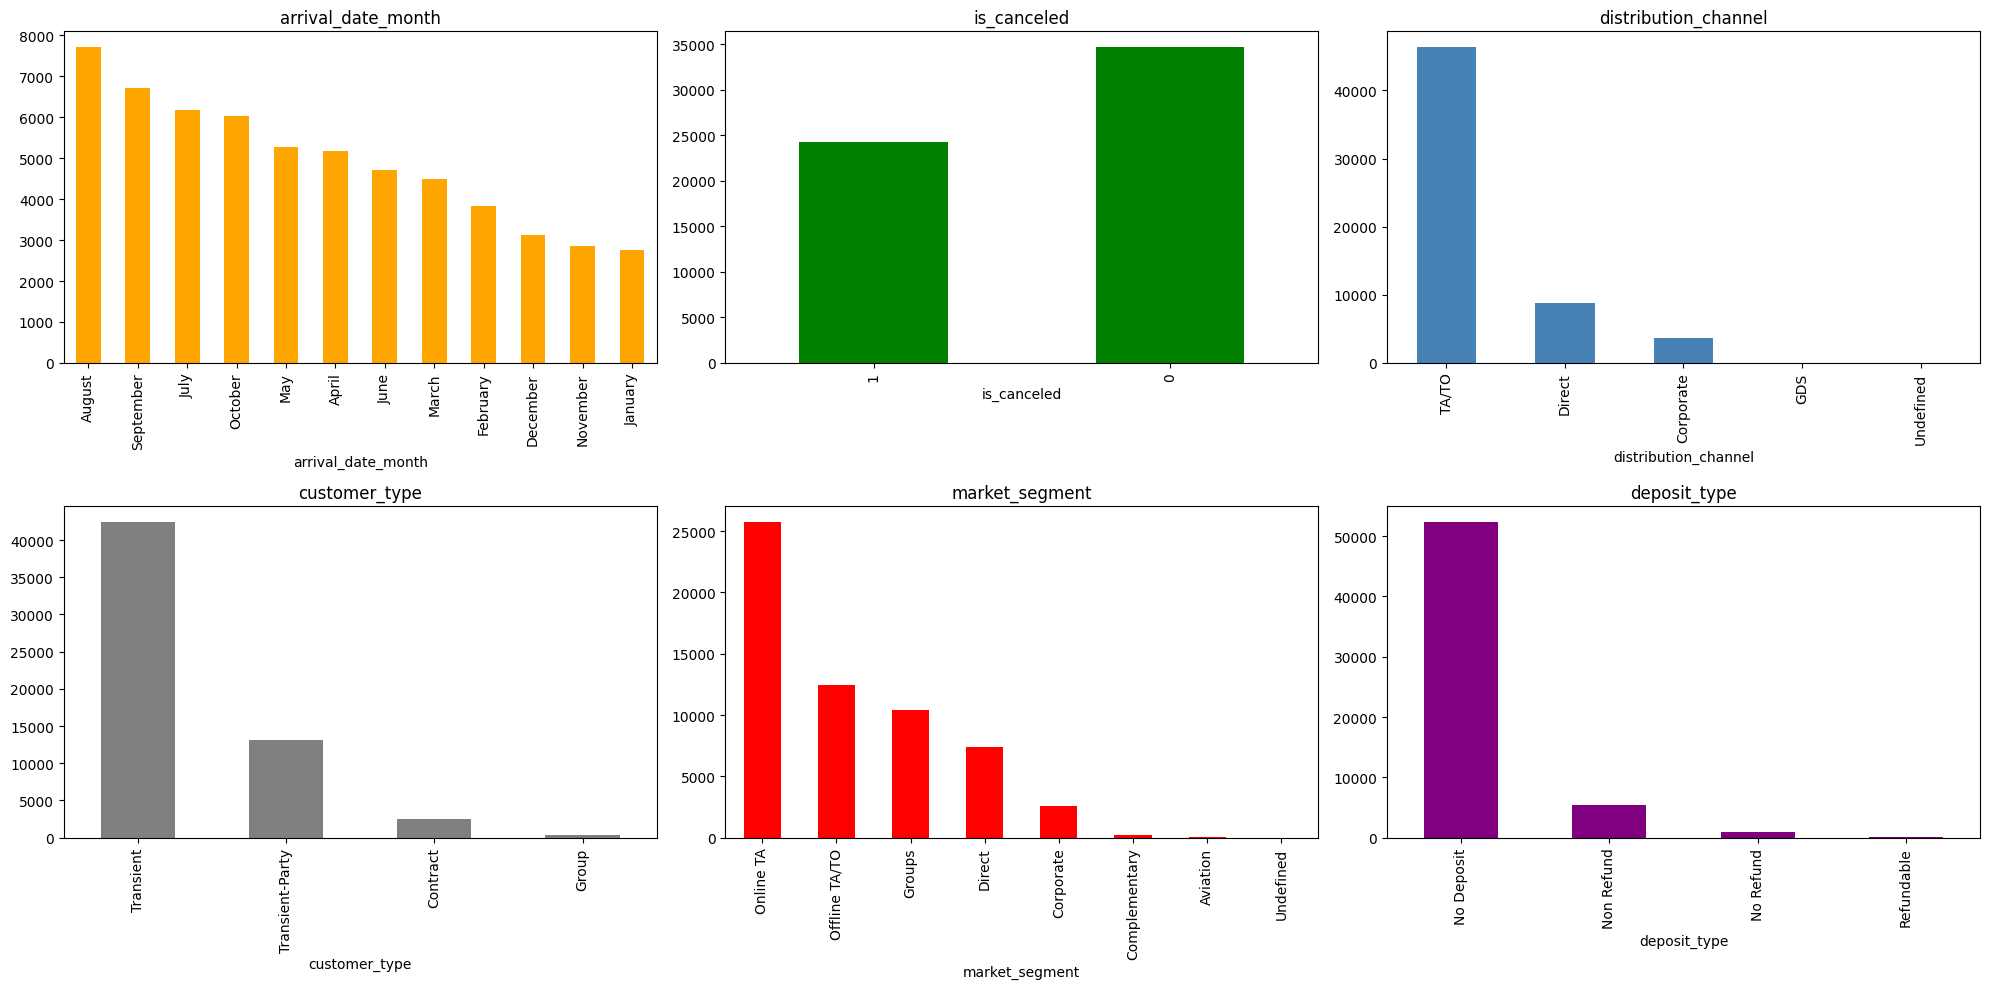

In [19]:
# Crear figura con 2 filas y 3 columnas de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Aplanar la matriz de ejes (para tener una lista de 6 ejes)
axes = axes.flatten()

hotel_df["arrival_date_month"].value_counts().plot(kind="bar", ax=axes[0], color="orange")
hotel_df["is_canceled"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=axes[1], color="green")
hotel_df["distribution_channel"].value_counts().plot(kind="bar", ax=axes[2], color="steelblue")
hotel_df["customer_type"].value_counts().plot(kind="bar", ax=axes[3], color="grey")
hotel_df["market_segment"].value_counts().plot(kind="bar", ax=axes[4], color="red")
hotel_df["deposit_type"].value_counts().plot(kind="bar", ax=axes[5], color="purple")

axes[0].set_title("arrival_date_month")
axes[1].set_title("is_canceled")
axes[2].set_title("distribution_channel")
axes[3].set_title("customer_type")
axes[4].set_title("market_segment")
axes[5].set_title("deposit_type")

plt.tight_layout()
plt.show()



Las gráficas de barras muestran patrones clave en el comportamiento de las reservas. Se observa estacionalidad según el mes de llegada, una proporción importante de cancelaciones, y un claro dominio de los canales de agencias de viaje en línea (TA/TO). Predominan los clientes transitorios y el segmento de mercado online, mientras que la mayoría de reservas se realizan sin depósito. Estos hallazgos ofrecen una primera aproximación al perfil de la demanda hotelera.



In [15]:
"""# Armando un boxplot para distribución por número de adultos
plt.figure(figsize=(20, 5))
plt.boxplot(hotel_df["adults"], showmeans=True, vert=False)
plt.title("Distribución por número de adultos")
plt.show()"""

'# Armando un boxplot para distribución por número de adultos\nplt.figure(figsize=(20, 5))\nplt.boxplot(hotel_df["adults"], showmeans=True, vert=False)\nplt.title("Distribución por número de adultos")\nplt.show()'

Para el análisis con boxplots se seleccionaron únicamente las variables numéricas que pueden aportar información relevante sobre patrones de reservas, comportamiento de los clientes y posibles valores atípicos. Variables como lead_time, stays_in_weekend_nights, stays_in_week_nights y adr permiten identificar outliers y diferencias en la anticipación, duración y precio de las estadías. Asimismo, los boxplots de adults, children y babies ayudan a caracterizar la composición de los grupos de huéspedes, mientras que previous_cancellations, previous_bookings_not_canceled, booking_changes y days_in_waiting_list reflejan aspectos del historial y la estabilidad de las reservas. Finalmente, required_car_parking_spaces y total_of_special_requests ofrecen información sobre necesidades adicionales de los clientes. En cambio, variables como arrival_date_week_number, arrival_date_day_of_month y kids no aportan valor analítico en este tipo de gráfica, por lo que se excluyeron.

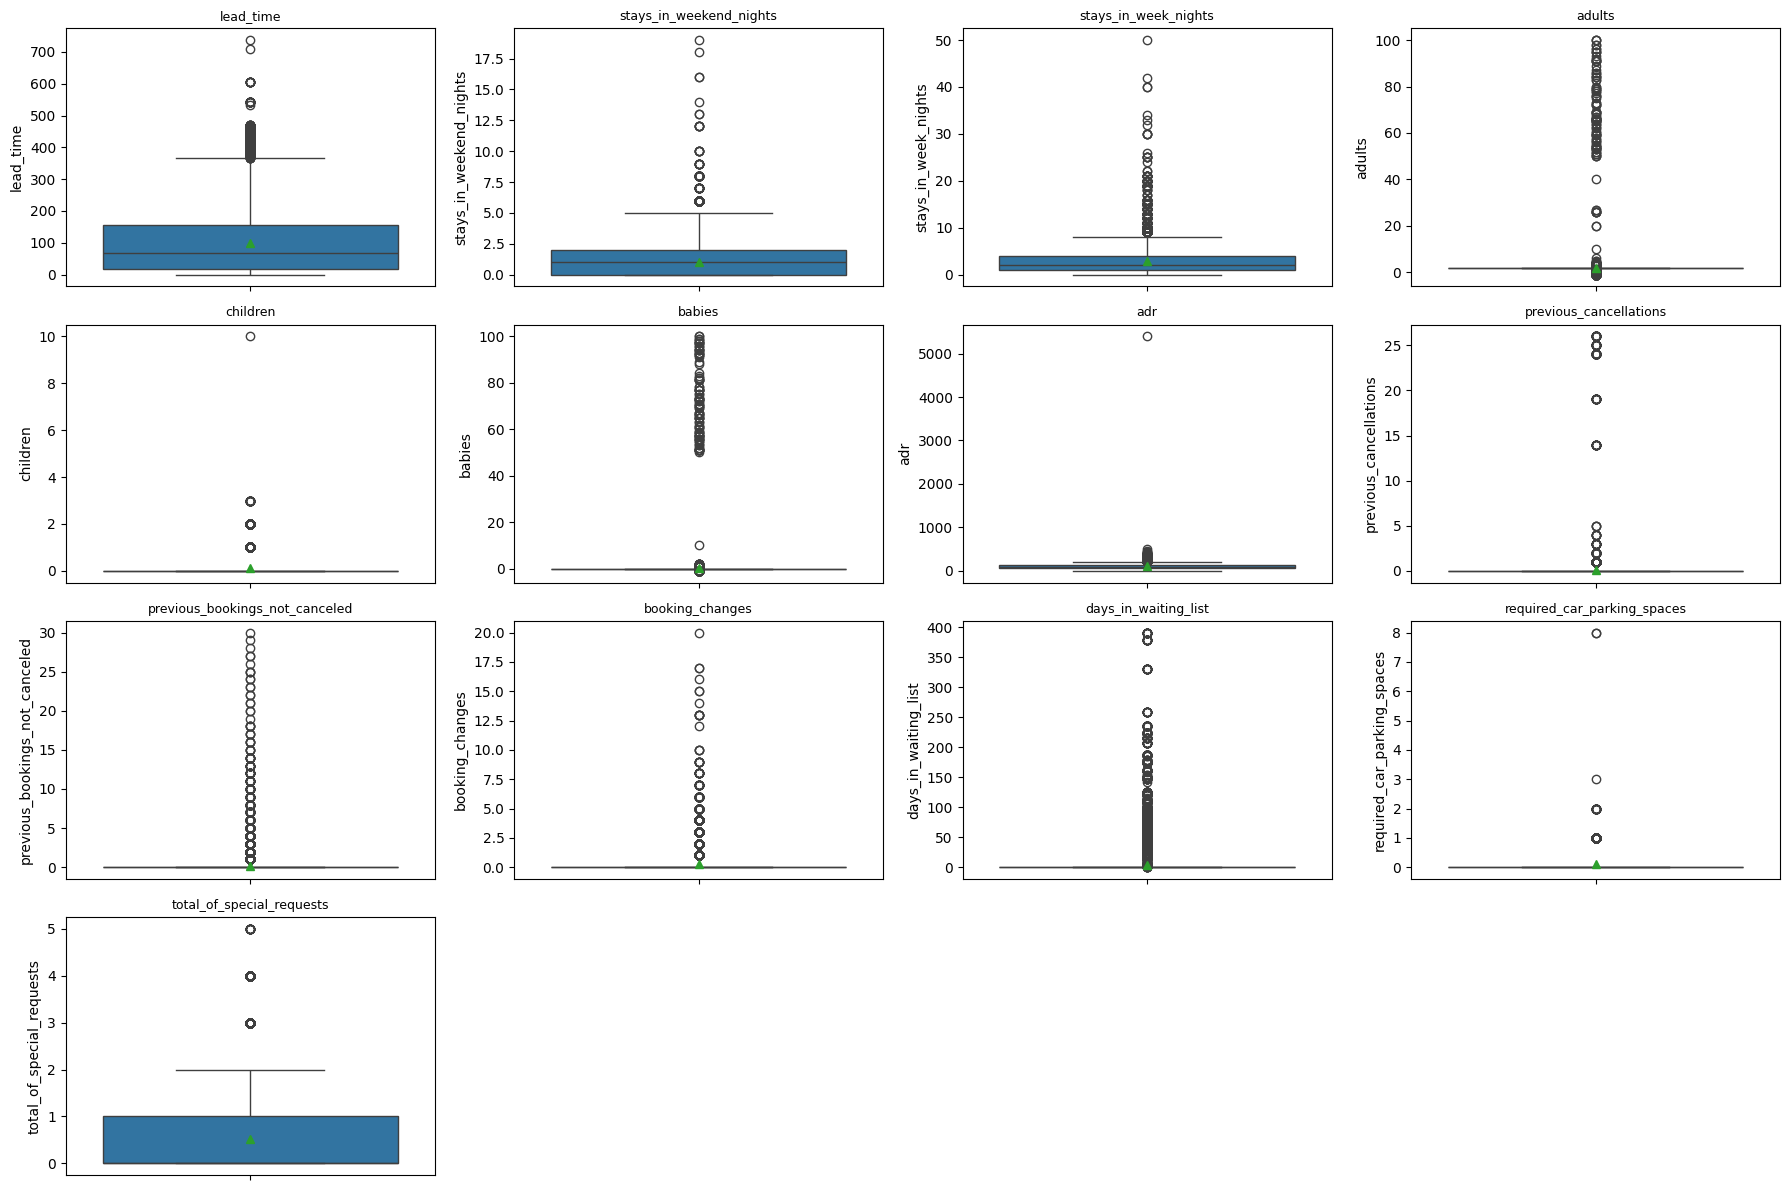

In [14]:
num_vars = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'adr',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

rows = 4
cols = 4

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), )
axes = axes.flatten()

# Graficar cada boxplot en su celda de la matriz
for i, col in enumerate(num_vars):
    sns.boxplot(y=hotel_df[col], ax=axes[i], showmeans=True)
    axes[i].set_title(col, fontsize=9)

# Eliminar ejes vacíos si sobran
for j in range(len(num_vars), rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Los boxplots permiten identificar que la mayoría de las variables numéricas presentan distribuciones muy concentradas en valores bajos con presencia de outliers significativos. En lead_time se observa que la mayoría de reservas se hacen con poca anticipación, aunque existen casos extremos de reservas realizadas con cientos de días de adelanto. Tanto stays_in_weekend_nights como stays_in_week_nights muestran que la mayoría de estancias son cortas, mientras que valores más largos aparecen como excepciones. En adr se detectan tarifas promedio concentradas en un rango bajo, pero con valores atípicos muy elevados que podrían distorsionar el análisis. Variables como adults, children y babies confirman que la mayoría de los grupos son pequeños, aunque existen registros inusuales de grupos muy numerosos. Finalmente, en previous_cancellations, booking_changes, days_in_waiting_list y total_of_special_requests la mayoría de los valores son cero, pero con pocos casos de valores altos que reflejan situaciones excepcionales en el comportamiento de los clientes.

### 2. Estrategia de Análisis

La estrategia de análisis comenzará con un acercamiento descriptivo a los datos, calculando estadísticos básicos como promedios, medianas, proporciones y frecuencias que nos permitan entender la distribución general de los atributos más relevantes. En el caso de las variables numéricas, también se tendrán en cuenta medidas de posición como los cuartiles, útiles para identificar cómo se reparten los valores y detectar asimetrías en la distribución. Para este análisis univariado, se usarán visualizaciones sencillas como histogramas, gráficos de barras y boxplots, los cuales ofrecen una visión clara tanto de las tendencias centrales como de la dispersión y los valores atípicos. Con este primer nivel, se busca tener un panorama sólido de las características principales del conjunto de datos.

Una vez alcanzado este entendimiento inicial, se avanzará hacia un análisis más profundo que involucre la relación entre varios atributos al mismo tiempo. Para esto se emplearán visualizaciones comparativas como boxplots segmentados por categorías (ejemplo: lead time en reservas canceladas vs no canceladas), gráficos de barras apiladas para entender la distribución de tipos de huéspedes o de canales de reserva según el estado de la reserva, y mapas de calor de correlaciones que ayuden a identificar vínculos entre variables numéricas como duración de estadía, anticipación de la reserva y número de huéspedes. Este enfoque permitirá descubrir patrones y factores determinantes que influyen en las cancelaciones y la ocupación hotelera. Con base en estos hallazgos, se podrán proponer recomendaciones concretas y fundamentadas en datos que apoyen a la cadena hotelera en la toma de decisiones estratégicas.

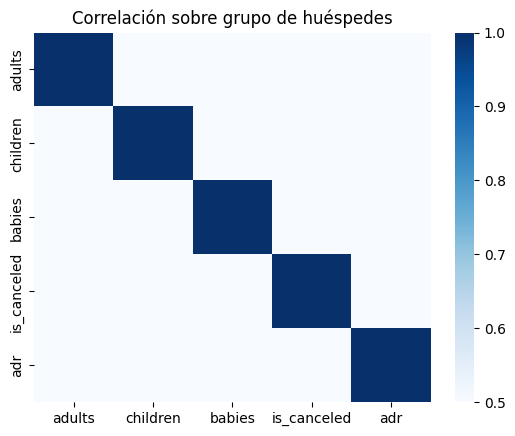

In [12]:
# Plotting correlation heatmap sobre grupo huéspedes
sns.heatmap(
    hotel_df[["adults", "children", "babies", "is_canceled","adr"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlación sobre grupo de huéspedes")
plt.show()